# Clustering Analysis of TLE Data


In [2]:
"""
This code was written for the Week 1 Mini-Challenge for the
Space Situational Awareness and Artifical Intelligence Undergraduate Research
Opportunity program. Please abide by the license in the repository when utilizing
our code.
"""

# Libaries used are pandas, requests, and math
import pandas as pd
import requests
import math

#######################################
####### Challenge Information ##########
########################################
cols = ["ID","a","e","M","BigO","SmallO","i","MeanMotion"]
# Orbits in kilometers
LEO = [0,2000]
MEO = [2000,35800]
GEO = [35786,500]
HEO = [30000]

########################################


class TLEAnalyzer:
    def __init__(self, fileadr,permission):
        """Initiates TLEReader with a file address"""
        try:
            if permission not in ["a", "w", "r","a+","w+","r+"]:
                raise Exception("Invalid Permission. Valid open file\
                permissions include 'a', 'w', or 'r'. ")
        except:
            print("Something went wrong.")
        try:
            self.file = open(fileadr, permission)
        except:
            print("Something went wrong.")
        self.tleData = pd.DataFrame(columns=cols)

    def parse(self):
        """Adds TLE data to pandas dataframe"""
        lines = self.file.readlines()
        for x in range(int(len(lines)/2)):
            new_row = self.parse_line(lines[2*x], lines[2*x+1])
            self.tleData = pd.concat([new_row, self.tleData]).reset_index(drop = True)

    def parse_line(self, line1, line2):
        """Returns row of values for database"""
        pick1 = []
        pick2 = [0,4,6,3,0,2]
        arrParsed = []
        arr0 = line1.split()
        arr1 = line2.split()
        #Calculate semi major axis(in km) using formula below
        period = 1/float(arr1[7])*3600*24
        a = (period*398600/(4*3.14**2))**(1/3)
        arrParsed = pd.DataFrame({"ID":arr0[1],"a":a,"e":arr1[4],"M":arr1[6],"BigO":arr1[3],"SmallO":arr1[5],"i":arr1[2],"MeanMotion":arr1[7]},index=[0])
        return arrParsed

    def find_Satellite_Info(self, id):
        """Searches https://www.celestrak.com/satcat/search-results.php for satellite info"""
        session = requests.session()
        satInfo = self.tleData.loc[self.tleData["ID"] == id]

    def print(self):
        print(self.tleData)

    # Week 1 Challenge Functions
    def print_Satellite_Info(self):
        """Prints orbital information about each satellite"""
        for index, row in self.tleData.iterrows():
            print("-------------------------" + row[0] + "------------------------------")
            orbit = self.calculate_orbit(row)
            print("The satellite is in " + orbit)
            ecc = self.orbit_style(row)
            print("The satellite is in " + ecc)
            ang = self.crit_ang(row)
            print("The satellite is " + ang)
            sun = self.sun_sync(row)
            print("The satellie is " + sun)
            print("\n")

    def calculate_orbit(self,row):
        """Calculates which orbit a satellite is in"""
        MeanMotion = float(row[7])
        if float(row[6]) < .05 and MeanMotion - 1 <= .01:
            return "Geostationary Orbit"
        else:
            if MeanMotion > 11:
                return "Low Earth Orbit"
            elif MeanMotion < 11 and MeanMotion > 1:
                return "Medium Earth Orbit"
            else:
                return "Highly-Elliptical Orbit"
        return "an unknown orbit"

    def orbit_style (self,row):
        """Determins nature of orbit based on eccentricity"""
        ecc = float("."+row[2])
        if ecc <= .01:
            return "Circular Orbit"
        elif ecc <= .02:
            return "Near-Circular Orbit"
        else:
            return "Elliptical Orbit"

    def crit_ang(self, row):
        """Checks if satellite is in a critically inclined orbit"""
        ang = float(row[6])
        arg_perg = float(row[5])
        orb_per = 1 / float(row[7])
        a = float(row[1])
        if abs(ang - 63.4) <= 2:
            if abs(arg_perg - 270) <= 16 and abs(orb_per - .5) <= .1:
                return "in Molniya Orbit (Critically Inclined)"
            else:
                return "Critically Inclined"
        else:
            return "Not Critically Inclined"

    def sun_sync(self, row):
        """Determines whether or not a satellite in a non-elliptical orbit is in a Sun Synchronous orbit"""
        a = float(row[1])
        i = float(row[6])
        u = 5.167 * (10**12)
        if self.orbit_style(row) == "Circular Orbit"\
         or self.orbit_style(row) == "Near-Circular Orbit":
                T = 2 * math.pi * ((a**3) / u)** (.5)
                x = -(T/3.796)**(7/3)
                if abs(x - math.cos(i)) <= .1 * abs(math.cos(i)):
                    return "in Sun Synchronous Orbit"
                else:
                    return "in non Sun Synchronous Orbit"
        else:
            return "Elliptical N/A"


In [3]:
satellite1 = TLEAnalyzer("./data/25473.txt","r")
satellite1.parse()
satellite2 = TLEAnalyzer("./data/26824.txt","r")
satellite2.parse()
satellite3 = TLEAnalyzer("./data/27438.txt","r")
satellite3.parse()
satellite4 = TLEAnalyzer("./data/39509.txt","r")
satellite4.parse()
satellite5 = TLEAnalyzer("./data/40258.txt","r")
satellite5.parse()

In [120]:
all_data = pd.concat([satellite1.tleData.iloc[:200,:],satellite2.tleData.iloc[:200,:],satellite3.tleData.iloc[:200,:],satellite4.tleData.iloc[:200,:],satellite5.tleData.iloc[:200,:]]).reset_index(drop = True)
all_data.head(20)

,ID,a,e,M,BigO,SmallO,i,MeanMotion
0,25473U,955.438689,-5.5142e-13,135.9651,078.8608,080.6352,001.1573,01.00120562
1,25473U,955.437296,-1.14362e-13,295.2874,078.8451,080.5567,001.1603,01.00121000
2,25473U,955.435130,-9.44067e-15,307.3868,078.8277,082.0213,001.1644,01.00121681
3,25473U,955.434322,-1.26776e-14,312.0835,078.8225,082.7817,001.1662,01.00121935
4,25473U,955.433562,-5.74354e-15,315.4964,078.8155,084.7197,001.1684,01.00122174
5,25473U,955.432916,-1.98022e-14,319.1837,078.8114,086.9877,001.1706,01.00122377
6,25473U,955.430193,-5.23771e-14,255.8721,078.9147,106.6896,001.1738,01.00123233
7,25473U,955.429213,-6.70125e-14,255.6815,078.9060,107.5163,001.1759,01.00123541
8,25473U,955.428269,-4.26167e-14,286.2908,078.8980,108.2600,001.1781,01.00123838
9,25473U,955.427499,-4.01629e-14,294.1729,078.8909,109.1538,001.1801,01.00124080


## Clustering Analysis Plan:
We will sum the differences of the eccentricity between satellites.

In [121]:
satellites = [satellite1,satellite2,satellite3,satellite4,satellite5]
satellites_stable = satellites.copy()
count = 0
for y in range(5):
    count = y
    satellite = satellites[y]
    for row in satellite.tleData.itertuples():
        e = satellites_stable[y].tleData.at[row.Index,"e"]
        satellite.tleData.at[row.Index,"e"] = 0
        for x in range(5):
            if x != count:
                if row.Index < 2526:
                    satellite.tleData.at[row.Index,"e"] += (float(e)-float(satellites[x].tleData.at[row.Index,"e"]))/10000000
satellites[0].tleData.head(20)

,ID,a,e,M,BigO,SmallO,i,MeanMotion
0,25473U,955.438689,-2.20079e-19,135.9651,078.8608,080.6352,001.1573,01.00120562
1,25473U,955.437296,-4.52709e-20,295.2874,078.8451,080.5567,001.1603,01.00121000
2,25473U,955.435130,-3.2045e-21,307.3868,078.8277,082.0213,001.1644,01.00121681
3,25473U,955.434322,-4.37663e-21,312.0835,078.8225,082.7817,001.1662,01.00121935
4,25473U,955.433562,-1.68737e-21,315.4964,078.8155,084.7197,001.1684,01.00122174
5,25473U,955.432916,-7.8045e-21,319.1837,078.8114,086.9877,001.1706,01.00122377
6,25473U,955.430193,-2.08824e-20,255.8721,078.9147,106.6896,001.1738,01.00123233
7,25473U,955.429213,-2.71331e-20,255.6815,078.9060,107.5163,001.1759,01.00123541
8,25473U,955.428269,-1.6187e-20,286.2908,078.8980,108.2600,001.1781,01.00123838
9,25473U,955.427499,-1.52896e-20,294.1729,078.8909,109.1538,001.1801,01.00124080


In [122]:
import numpy as np
satellites = [satellite1.tleData,satellite2.tleData,satellite3.tleData,satellite4.tleData,satellite5.tleData]
x = pd.concat(satellites).reset_index(drop = True).iloc[:,[0,2]]
# x_data = np.array(x).reshape(-1,1)
# y = pd.concat(satellites).reset_index(drop = True).iloc[:,0]
x.loc[x["ID"]=="25473U","ID"] = 0
x.loc[x["ID"]=="26824U","ID"] = 1
x.loc[x["ID"]=="27438U","ID"] = 2
x.loc[x["ID"]=="39509U","ID"] = 3
x.loc[x["ID"]=="40258U","ID"] = 4 
x.tail(20)

,ID,e
13944,4,0
13945,4,0
13946,4,0
13947,4,0
13948,4,0
13949,4,0
13950,4,0
13951,4,0
13952,4,0
13953,4,0


In [123]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

km = KMeans(
    n_clusters = 2, init = 'random',
    n_init = 20, max_iter = 300,
    tol = 1e-04, random_state = 0
)
y_km = km.fit_predict(x)

# le = preprocessing.LabelEncoder()
# dataset_2 = dataset.apply(le.fit_transform)
# y_actual = dataset_2.iloc[:, 0]
# print('Accuracy = ', metrics.accuracy_score(y_actual, y_km))

## Plotting


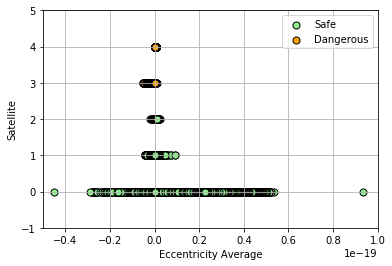

In [130]:
a = plt.scatter(
    x.iloc[y_km == 0, 1], x.iloc[y_km == 0, 0],
    s=50, c='lightgreen',
    marker='o', edgecolor='black',
    label='Safe'
)

b = plt.scatter(
    x.iloc[y_km == 1, 1], x.iloc[y_km == 1, 0],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='Dangerous'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.xlabel("Eccentricity Average")
plt.ylabel("Satellite")
plt.ylim(-1,5)
plt.xlim(-.00000000000000000005,.0000000000000000001)
plt.show()